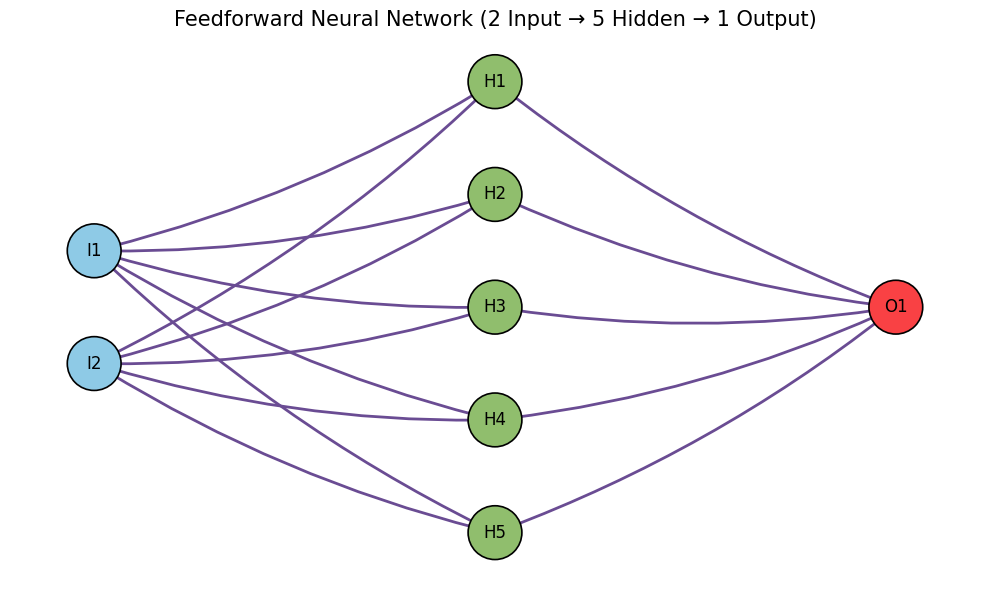

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layer sizes
input_size = 2
hidden_size = 5
output_size = 1

# Create directed graph
G = nx.DiGraph()

# Define node labels
input_nodes = [f"I{i+1}" for i in range(input_size)]
hidden_nodes = [f"H{j+1}" for j in range(hidden_size)]
output_nodes = [f"O{k+1}" for k in range(output_size)]

# Add nodes with 'layer' attribute
for n in input_nodes:
    G.add_node(n, layer="Input")

for n in hidden_nodes:
    G.add_node(n, layer="Hidden")

for n in output_nodes:
    G.add_node(n, layer="Output")

# Add edges (without weights)
for i in input_nodes:
    for h in hidden_nodes:
        G.add_edge(i, h)

for h in hidden_nodes:
    for o in output_nodes:
        G.add_edge(h, o)

# Assign positions for a clean layout
def layer_pos(nodes, x_layer, y_gap=1.2):
    total = len(nodes)
    return {
        node: (x_layer, -i * y_gap + y_gap * (total - 1) / 2)
        for i, node in enumerate(nodes)
    }

pos = {}
pos.update(layer_pos(input_nodes, 0))
pos.update(layer_pos(hidden_nodes, 1))
pos.update(layer_pos(output_nodes, 2))

# Define node colors by layer
layer_colors = {
    "Input": "#8ecae6",   # sky blue
    "Hidden": "#90be6d",  # green
    "Output": "#f94144"   # red
}
node_colors = [layer_colors[G.nodes[n]["layer"]] for n in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, edgecolors='black', linewidths=1.2)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
nx.draw_networkx_edges(G, pos, width=2, edge_color="#6a4c93", arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.08')

plt.title("Feedforward Neural Network (2 Input → 5 Hidden → 1 Output)", fontsize=15)
plt.axis("off")
plt.tight_layout()
plt.show()

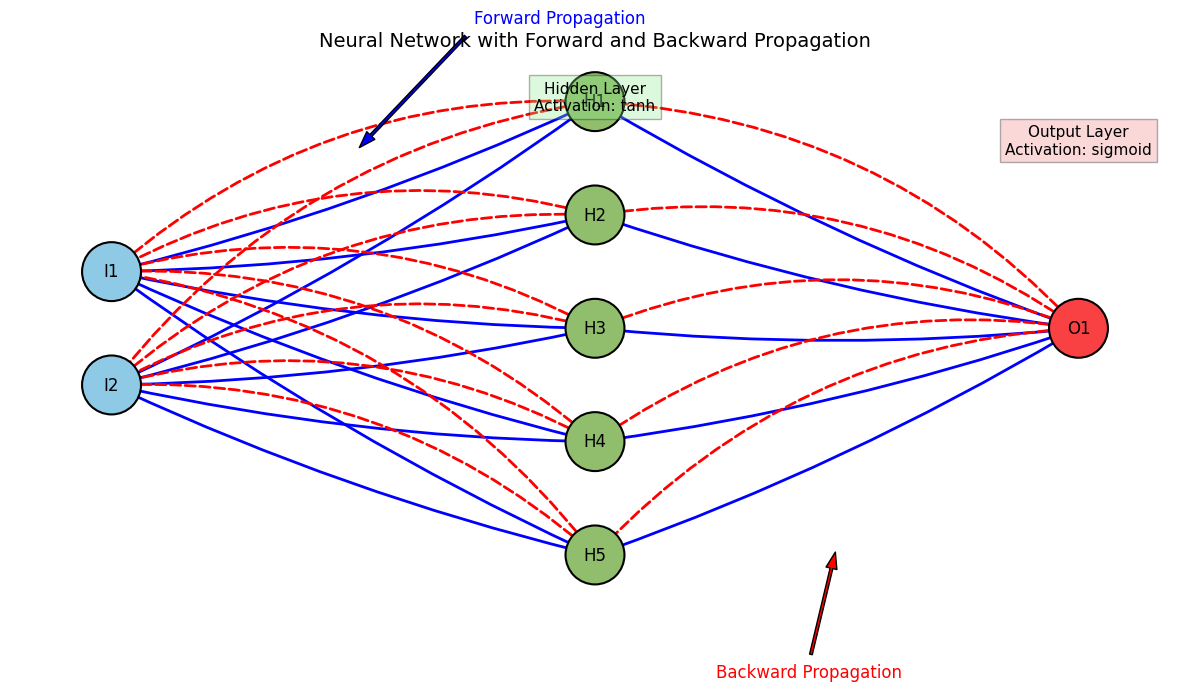

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layer sizes
input_size = 2
hidden_size = 5
output_size = 1

# Create directed graph
G = nx.DiGraph()

# Nodes
input_nodes = [f"I{i+1}" for i in range(input_size)]
hidden_nodes = [f"H{j+1}" for j in range(hidden_size)]
output_nodes = [f"O{k+1}" for k in range(output_size)]

# Add nodes with layer tags
for node in input_nodes:
    G.add_node(node, layer="Input")
for node in hidden_nodes:
    G.add_node(node, layer="Hidden")
for node in output_nodes:
    G.add_node(node, layer="Output")

# Forward edges
for i in input_nodes:
    for h in hidden_nodes:
        G.add_edge(i, h, direction="forward")
for h in hidden_nodes:
    for o in output_nodes:
        G.add_edge(h, o, direction="forward")

# Backward edges
for o in output_nodes:
    for h in hidden_nodes:
        G.add_edge(o, h, direction="backward")
for h in hidden_nodes:
    for i in input_nodes:
        G.add_edge(h, i, direction="backward")

# Positions
def layer_pos(nodes, x, y_gap=1.3):
    total = len(nodes)
    return {
        node: (x, -i * y_gap + y_gap * (total - 1) / 2)
        for i, node in enumerate(nodes)
    }

pos = {}
pos.update(layer_pos(input_nodes, 0))
pos.update(layer_pos(hidden_nodes, 2))
pos.update(layer_pos(output_nodes, 4))

# Colors
layer_colors = {"Input": "#8ecae6", "Hidden": "#90be6d", "Output": "#f94144"}
node_colors = [layer_colors[G.nodes[n]['layer']] for n in G.nodes]

# Separate edges
forward_edges = [(u, v) for u, v, d in G.edges(data=True) if d["direction"] == "forward"]
backward_edges = [(u, v) for u, v, d in G.edges(data=True) if d["direction"] == "backward"]

# Draw
plt.figure(figsize=(12, 7))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1800, edgecolors="black", linewidths=1.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

# Draw forward arrows (solid blue)
nx.draw_networkx_edges(
    G, pos, edgelist=forward_edges, width=2,
    edge_color="blue", arrows=True, arrowstyle="->", connectionstyle="arc3,rad=0.05"
)

# Draw backward arrows (dashed red)
nx.draw_networkx_edges(
    G, pos, edgelist=backward_edges, width=2,
    edge_color="red", style="dashed", arrows=True, arrowstyle="<-", connectionstyle="arc3,rad=0.2"
)

# Annotations
plt.text(2, 2.5, "Hidden Layer\nActivation: tanh", fontsize=11, ha="center",
         bbox=dict(facecolor='lightgreen', alpha=0.3))
plt.text(4, 2.0, "Output Layer\nActivation: sigmoid", fontsize=11, ha="center",
         bbox=dict(facecolor='lightcoral', alpha=0.3))

plt.annotate("Forward Propagation", xy=(1, 2), xytext=(1.5, 3.5),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=2, headwidth=8), fontsize=12, color="blue")

plt.annotate("Backward Propagation", xy=(3, -2.5), xytext=(2.5, -4),
             arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8), fontsize=12, color="red")

plt.title("Neural Network with Forward and Backward Propagation", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


In [1]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

# Example usage:
tensor = torch.tensor([1, 2, 3]).to(device)
print(tensor)

CUDA is not available. Using CPU.
tensor([1, 2, 3])
